In [315]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import string

# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

# ML libraries
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# 1. Load and prepare the dataset
# Read the CSV file
df = pd.read_csv('Spam_SMS.csv')

import warnings

warnings.filterwarnings("ignore")


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [253]:

# Read the CSV file
spam_df = pd.read_csv('Spam_SMS.csv')

# Display the shape of the dataframe
print('DataFrame shape: ' + str(spam_df.shape))

# Check for duplicate rows and remove them
print('Number of duplicate rows: ' + str(spam_df.duplicated().sum()))
spam_df = spam_df.drop_duplicates()
print('DataFrame shape after removing duplicates: ' + str(spam_df.shape))




DataFrame shape: (5574, 2)
Number of duplicate rows: 415
DataFrame shape after removing duplicates: (5159, 2)


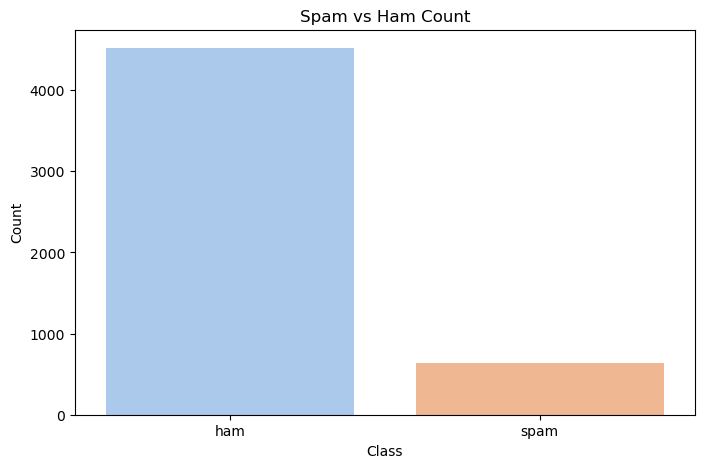

In [317]:
# Plotting distribution of spam vs ham
plt.figure(figsize=(8,5))
sns.countplot(data=spam_df, x='Class', palette='pastel')
plt.title('Spam vs Ham Count')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

warnings.filterwarnings("ignore")


In [257]:
# Create a message length feature
spam_df['Message_Length'] = spam_df['Message'].apply(len)


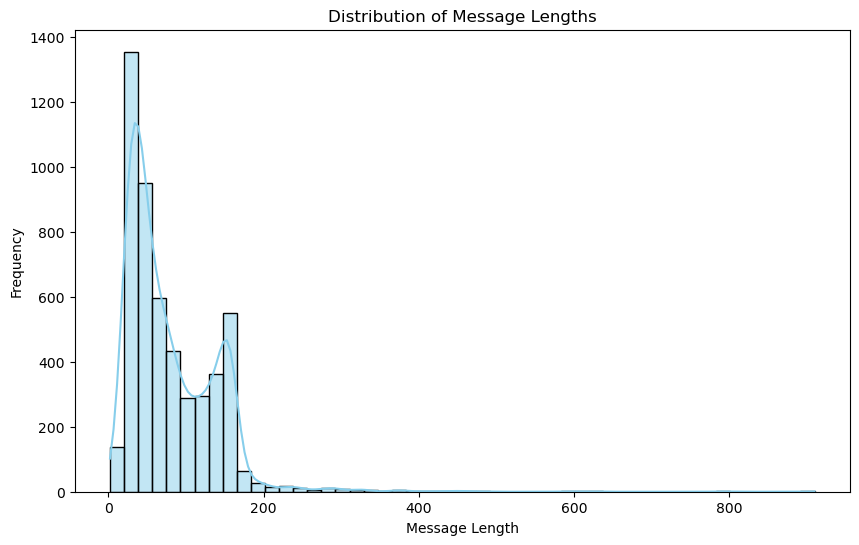

In [259]:
# Histogram of message lengths
plt.figure(figsize=(10,6))
sns.histplot(spam_df['Message_Length'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()


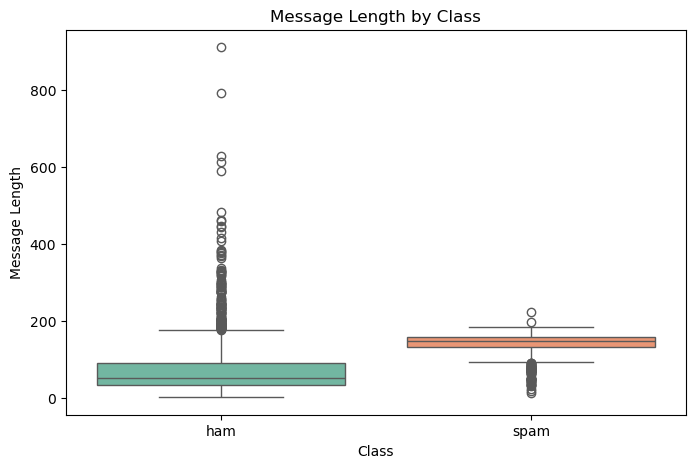

In [319]:
# Boxplot of message lengths by class
plt.figure(figsize=(8,5))
sns.boxplot(x='Class', y='Message_Length', data=spam_df, palette='Set2')
plt.title('Message Length by Class')
plt.xlabel('Class')
plt.ylabel('Message Length')
plt.show()


warnings.filterwarnings("ignore")

In [263]:
# Calculate summary statistics for message length by class
print('\
Summary statistics for message length by class:')
print(spam_df.groupby('Class')['Message_Length'].describe())


Summary statistics for message length by class:
        count        mean        std   min    25%    50%    75%    max
Class                                                                 
ham    4518.0   70.861000  56.584513   2.0   34.0   53.0   91.0  910.0
spam    641.0  137.413417  29.998996  13.0  131.0  148.0  157.0  223.0


In [265]:
# Encode categorical variables: Convert 'Class' to numeric
spam_df['Class_Encoded'] = spam_df['Class'].map({'ham': 0, 'spam': 1})


In [267]:
# Check the encoding
print('\
Encoded class head:')
print(spam_df[['Class', 'Class_Encoded']].head())



Encoded class head:
  Class  Class_Encoded
0   ham              0
1   ham              0
2  spam              1
3   ham              0
4   ham              0


In [269]:

# Count the number of words in each message
spam_df['Word_Count'] = spam_df['Message'].apply(lambda x: len(x.split()))



In [321]:
# Count the number of special characters in each message
import re
spam_df['Special_Char_Count'] = spam_df['Message'].apply(lambda x: len(re.findall('[^a-zA-Z0-9\s]', x)))

warnings.filterwarnings("ignore")


In [323]:
# Count the number of digits in each message
spam_df['Digit_Count'] = spam_df['Message'].apply(lambda x: len(re.findall('\d', x)))



warnings.filterwarnings("ignore")

In [275]:
# Display the head of the dataframe with new features
print('\
DataFrame head with new features:')
print(spam_df.head())


DataFrame head with new features:
  Class                                            Message  Message_Length  \
0   ham  Go until jurong point, crazy.. Available only ...             111   
1   ham                      Ok lar... Joking wif u oni...              29   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3   ham  U dun say so early hor... U c already then say...              49   
4   ham  Nah I don't think he goes to usf, he lives aro...              61   

   Class_Encoded  Word_Count  Special_Char_Count  Digit_Count  
0              0          20                   9            0  
1              0           6                   6            0  
2              1          28                   6           25  
3              0          11                   6            0  
4              0          13                   2            0  


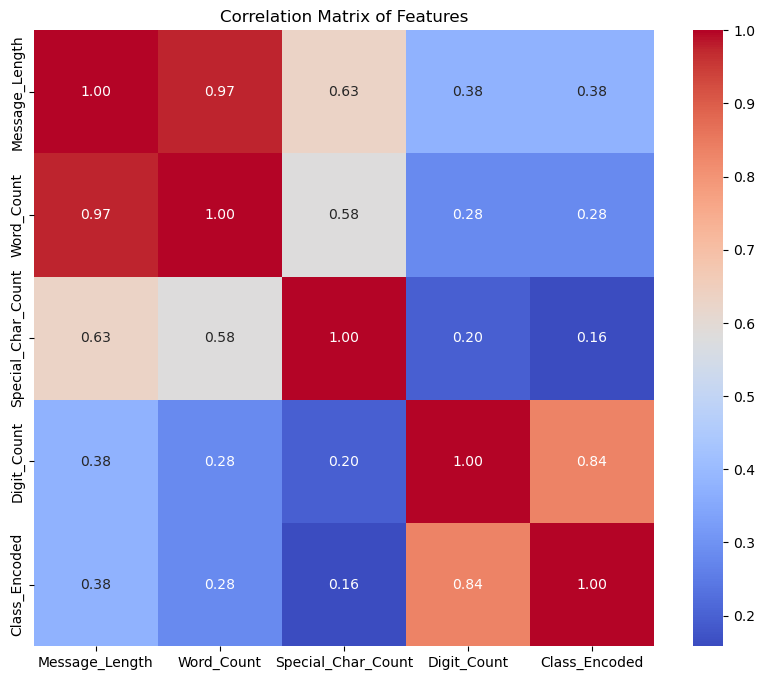

In [277]:
# Correlation matrix of numerical features
plt.figure(figsize=(10,8))
correlation_matrix = spam_df[['Message_Length', 'Word_Count', 'Special_Char_Count', 'Digit_Count', 'Class_Encoded']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Features')
plt.show()



In [279]:

# Scaling numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_to_scale = ['Message_Length', 'Word_Count', 'Special_Char_Count', 'Digit_Count']
spam_df[['Scaled_' + col for col in features_to_scale]] = scaler.fit_transform(spam_df[features_to_scale])


In [281]:
print('\
Head with scaled features:')
print(spam_df[['Message_Length', 'Scaled_Message_Length', 'Word_Count', 'Scaled_Word_Count']].head())



Head with scaled features:
   Message_Length  Scaled_Message_Length  Word_Count  Scaled_Word_Count
0             111               0.546810          20           0.413543
1              29              -0.860109           6          -0.847531
2             155               1.301741          28           1.134157
3              49              -0.516958          11          -0.397148
4              61              -0.311067          13          -0.216994


In [283]:
# Save the preprocessed dataframe
spam_df.to_csv('preprocessed_spam_sms.csv', index=False)
print('\
Preprocessed data saved to preprocessed_spam_sms.csv')

print('Preprocessing and EDA completed.')

Preprocessed data saved to preprocessed_spam_sms.csv
Preprocessing and EDA completed.


In [287]:
spam_df = pd.read_csv('preprocessed_spam_sms.csv')

print('Dataset shape:', spam_df.shape)
print('Class distribution:')
print(spam_df['Class'].value_counts())


Dataset shape: (5159, 11)
Class distribution:
Class
ham     4518
spam     641
Name: count, dtype: int64


In [289]:
# Split the data into features and target
X = spam_df['Message']  # We'll use the raw text for text vectorization
y = spam_df['Class_Encoded']



In [291]:
# Additional numerical features
numerical_features = spam_df[['Message_Length', 'Word_Count', 'Special_Char_Count', 'Digit_Count']]


In [293]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test, num_train, num_test = train_test_split(
    X, y, numerical_features, test_size=0.2, random_state=42, stratify=y
)

print('Training set shape:', X_train.shape)
print('Testing set shape:', X_test.shape)



Training set shape: (4127,)
Testing set shape: (1032,)


In [301]:
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, 
    confusion_matrix, classification_report, roc_curve, auc
)

# Function to evaluate model performance
def evaluate_model(model, X_test, y_test, model_name, labels=["Ham", "Spam"]):
    start_time = time.time()
    y_pred = model.predict(X_test)
    end_time = time.time()
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='binary')
    recall = recall_score(y_test, y_pred, average='binary')
    f1 = f1_score(y_test, y_pred, average='binary')
    
    # Print results
    print(f"\n{model_name} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"Inference Time: {end_time - start_time:.4f} seconds")
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()
    
    # Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred, target_names=labels))
    
    # ROC Curve if the model supports predict_proba
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        roc_auc = auc(fpr, tpr)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'ROC Curve - {model_name}')
        plt.legend(loc="lower right")
        plt.show()
    
    return {
        'model_name': model_name,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1,
        'confusion_matrix': cm
    }



In [303]:
# Create a list to store model results
model_results = []


In [305]:
print("Starting model training and evaluation...")
print("done")


Starting model training and evaluation...
done


In [309]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB


Training Naive Bayes with TF-IDF...

Naive Bayes with TF-IDF Results:
Accuracy: 0.9690
Precision: 1.0000
Recall: 0.7500
F1 Score: 0.8571
Inference Time: 0.0353 seconds


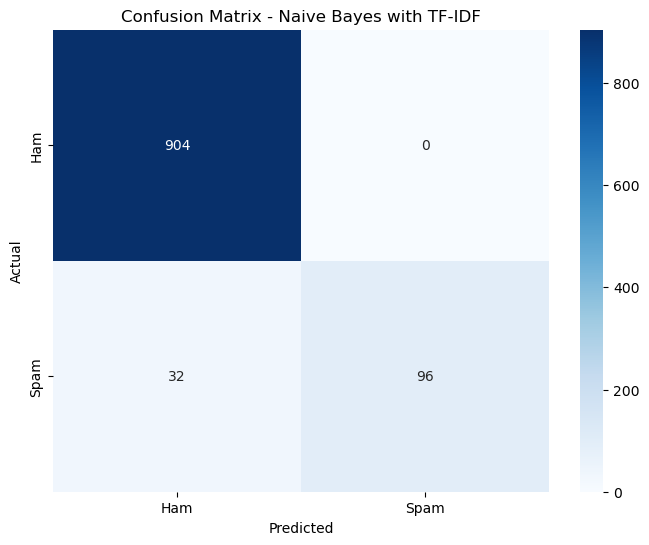


Classification Report:
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       904
        Spam       1.00      0.75      0.86       128

    accuracy                           0.97      1032
   macro avg       0.98      0.88      0.92      1032
weighted avg       0.97      0.97      0.97      1032



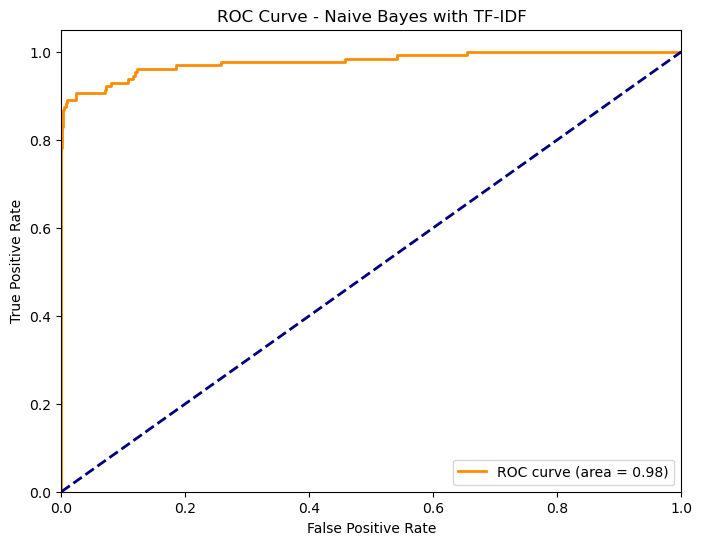

Naive Bayes with TF-IDF completed.


In [311]:
# Model 1: Naive Bayes with TF-IDF
print("Training Naive Bayes with TF-IDF...")
nb_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('classifier', MultinomialNB())
])

nb_tfidf.fit(X_train, y_train)
nb_results = evaluate_model(nb_tfidf, X_test, y_test, "Naive Bayes with TF-IDF")
model_results.append(nb_results)

print("Naive Bayes with TF-IDF completed.")


Training Logistic Regression with TF-IDF...

Logistic Regression with TF-IDF Results:
Accuracy: 0.9593
Precision: 0.9886
Recall: 0.6797
F1 Score: 0.8056
Inference Time: 0.0671 seconds


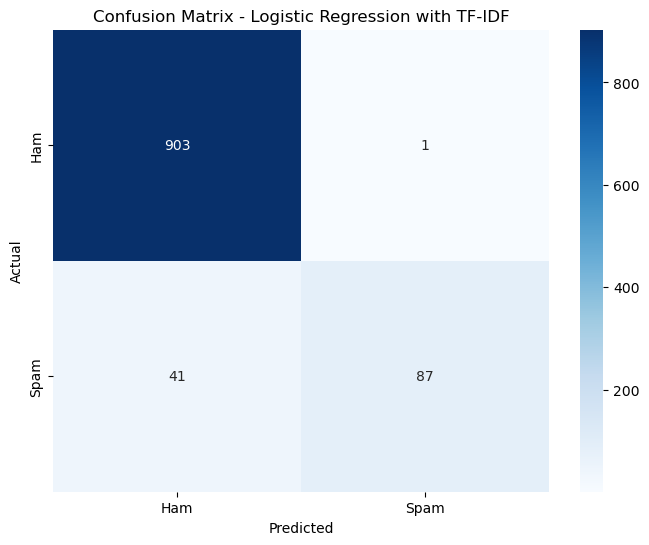


Classification Report:
              precision    recall  f1-score   support

         Ham       0.96      1.00      0.98       904
        Spam       0.99      0.68      0.81       128

    accuracy                           0.96      1032
   macro avg       0.97      0.84      0.89      1032
weighted avg       0.96      0.96      0.96      1032



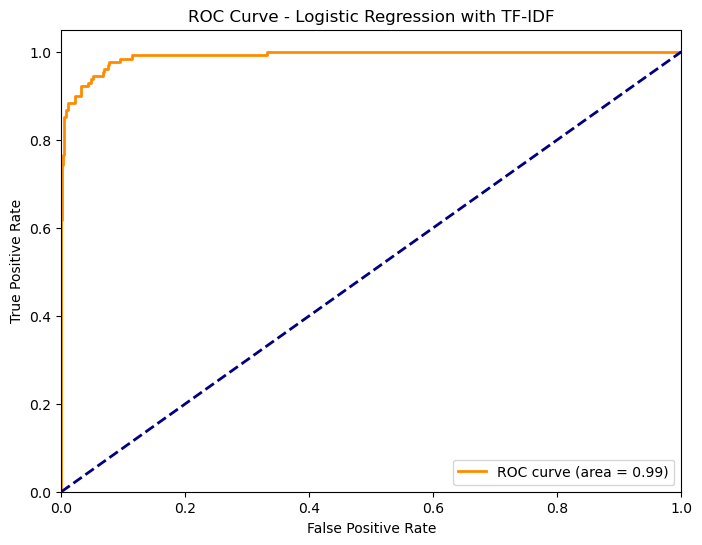

Logistic Regression with TF-IDF completed.


In [325]:
# Model 2: Logistic Regression with TF-IDF
print("Training Logistic Regression with TF-IDF...")
lr_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])

lr_tfidf.fit(X_train, y_train)
lr_results = evaluate_model(lr_tfidf, X_test, y_test, "Logistic Regression with TF-IDF")
model_results.append(lr_results)

print("Logistic Regression with TF-IDF completed.")

Training Random Forest with TF-IDF...

Random Forest with TF-IDF Results:
Accuracy: 0.9680
Precision: 0.9897
Recall: 0.7500
F1 Score: 0.8533
Inference Time: 0.1144 seconds


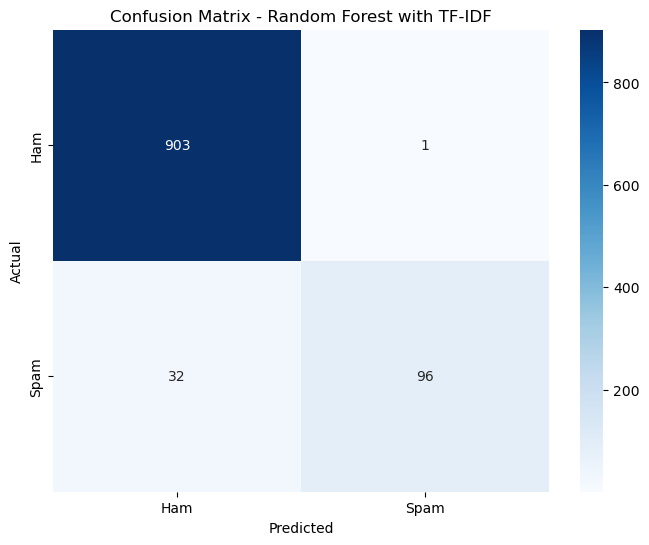


Classification Report:
              precision    recall  f1-score   support

         Ham       0.97      1.00      0.98       904
        Spam       0.99      0.75      0.85       128

    accuracy                           0.97      1032
   macro avg       0.98      0.87      0.92      1032
weighted avg       0.97      0.97      0.97      1032



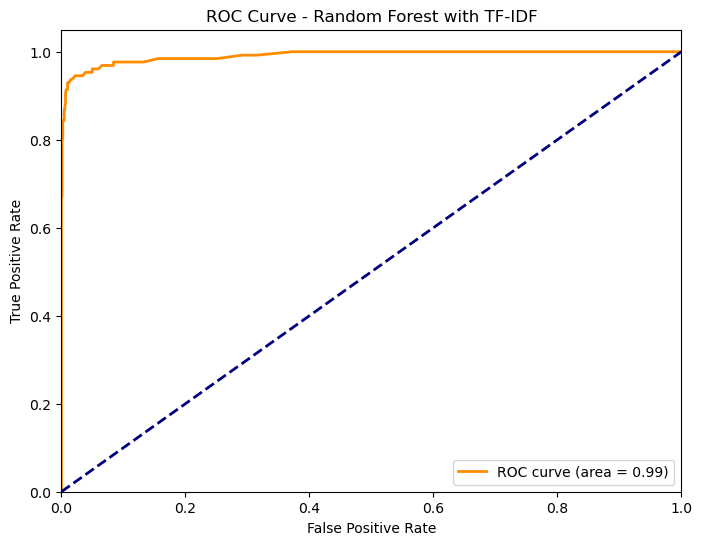

Random Forest with TF-IDF completed.


In [341]:
# Model: Random Forest with TF-IDF
print("Training Random Forest with TF-IDF...")

rf_tfidf = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_tfidf.fit(X_train, y_train)
rf_results = evaluate_model(rf_tfidf, X_test, y_test, "Random Forest with TF-IDF")
model_results.append(rf_results)

print("Random Forest with TF-IDF completed.")


In [343]:
from sklearn.ensemble import VotingClassifier

# Model 4: Ensemble Voting Classifier
# We need to create fresh estimators, not use the already fitted pipelines
print("Training Ensemble Voting Classifier with TF-IDF...")

# Create a shared TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# Create base classifiers
nb = MultinomialNB()
lr = LogisticRegression(max_iter=1000, random_state=42)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Create and train the ensemble
ensemble = VotingClassifier(
    estimators=[
        ('nb', nb),
        ('lr', lr),
        ('rf', rf)
    ],
    voting='soft'
)

# Train the ensemble on the vectorized data
ensemble.fit(X_train_tfidf, y_train)

# Evaluate the ensemble
start_time = time.time()
y_pred = ensemble.predict(X_test_tfidf)
inference_time = time.time() - start_time

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label=1)  
recall = recall_score(y_test, y_pred, pos_label=1)


f1 = f1_score(y_test, y_pred, pos_label=1)

# Print results
print("\
Ensemble Voting Classifier Results:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Inference Time: {inference_time:.4f} seconds")

print("\
Classification Report:")
print(classification_report(y_test, y_pred))

# Create a result dictionary for the ensemble
ensemble_results = {
    'Model': 'Ensemble Voting Classifier with TF-IDF',
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1,
    'Inference Time': inference_time
}

# Add to model results

model_results = []  # Ensure this is declared before appending

model_results.append(ensemble_results)

print("Ensemble Voting Classifier completed.")

# Print summary of model results
print("\
Summary of Model Results:")
for result in model_results:
    print(f"Model: {result['Model']}")
    print(f"Accuracy: {result['Accuracy']:.4f}")
    print(f"Precision: {result['Precision']:.4f}")
    print(f"Recall: {result['Recall']:.4f}")
    print(f"F1 Score: {result['F1 Score']:.4f}")
    print(f"Inference Time: {result['Inference Time']:.4f} seconds")
    print()

print("done")

Training Ensemble Voting Classifier with TF-IDF...
Ensemble Voting Classifier Results:
Accuracy: 0.9690
Precision: 1.0000
Recall: 0.7500
F1 Score: 0.8571
Inference Time: 0.0676 seconds
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       904
           1       1.00      0.75      0.86       128

    accuracy                           0.97      1032
   macro avg       0.98      0.88      0.92      1032
weighted avg       0.97      0.97      0.97      1032

Ensemble Voting Classifier completed.
Summary of Model Results:
Model: Ensemble Voting Classifier with TF-IDF
Accuracy: 0.9690
Precision: 1.0000
Recall: 0.7500
F1 Score: 0.8571
Inference Time: 0.0676 seconds

done


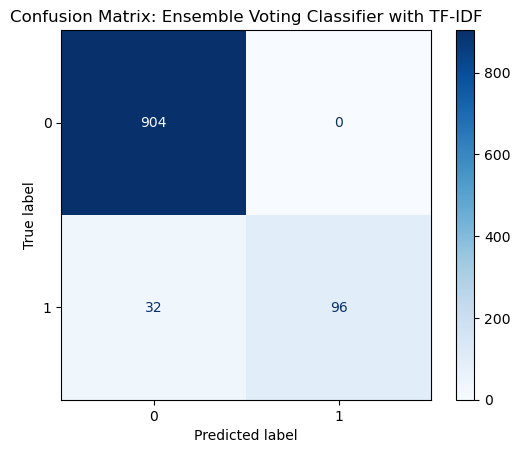

In [345]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues', values_format='d')  # 'Blues' for better visualization

# Show the plot
plt.title("Confusion Matrix: Ensemble Voting Classifier with TF-IDF")
plt.show()


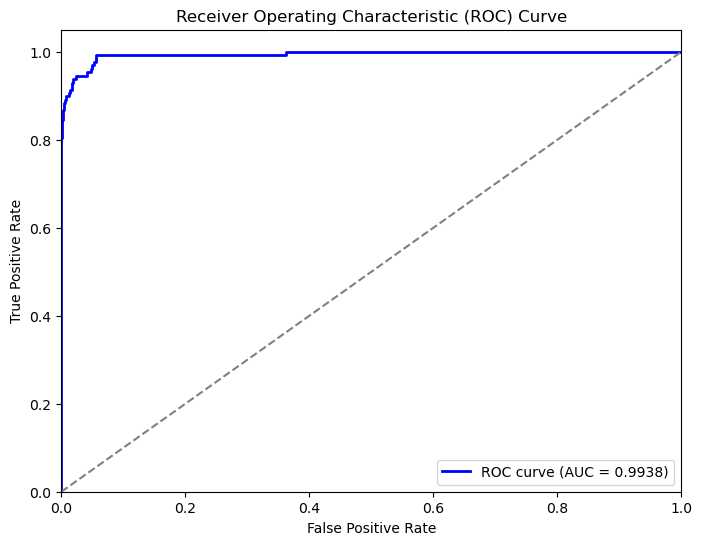

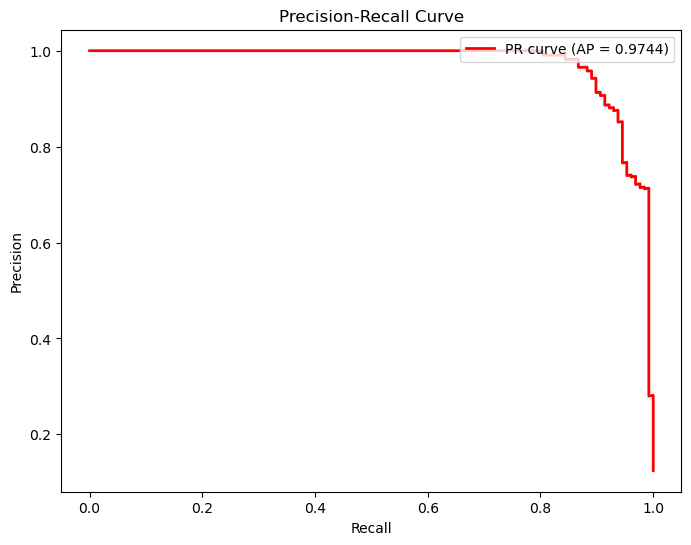

In [349]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Get the predicted probabilities for the positive class (Spam = 1)
y_probs = ensemble.predict_proba(X_test_tfidf)[:, 1]  # Probability of class 1


fpr, tpr, _ = roc_curve(y_test, y_probs)  # Compute ROC curve
roc_auc = auc(fpr, tpr)  # Compute AUC

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


precision, recall, _ = precision_recall_curve(y_test, y_probs)
avg_precision = average_precision_score(y_test, y_probs)

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='red', lw=2, label=f'PR curve (AP = {avg_precision:.4f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()
